# 第二章 引言

## 1.来自bit.ly的1.usa.gov数据

数据集来源：

    http://1usagov.measuredvoice.com/2013/

In [1]:
### 设置文件的路径并命名为path,打开该文件读取第一行 ，根据运行结果可知该数据为json格式（JavaScript Object Notation）
path = 'usagov/usagov_bitly_data2013-05-17-1368825005'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (iPhone; CPU iPhone OS 6_1 like Mac OS X) AppleWebKit\\/536.26 (KHTML, like Gecko) Mobile\\/10B141", "c": "US", "nk": 0, "tz": "America\\/New_York", "gr": "NY", "g": "18QIXVF", "h": "18QIXVE", "l": "fsanewmedia", "al": "en-us", "hh": "1.usa.gov", "r": "http:\\/\\/t.co\\/AFTsMdeDxj", "u": "http:\\/\\/studentaid.ed.gov\\/prepare-for-college\\/choosing-schools\\/consider?sf12931238=1#statistics-that-count", "t": 1368825005, "hc": 1368819909, "cy": "Geneva", "ll": [ 42.856300, -77.025101 ] }\n'

In [8]:
import json    #导入json包
path = 'usagov/usagov_bitly_data2013-05-17-1368828605.txt'
for line in open(path,encoding='utf-8'):  #for循环
#     print(type(line),line)
    pass

'''
print打印结果的第一条
<class 'str'> { "a": "Mozilla\/5.0 (iPhone; CPU iPhone OS 6_1 like Mac OS X) AppleWebKit\/536.26 (KHTML,
like Gecko) Version\/6.0 Mobile\/10B143 Safari\/8536.25", "c": "NZ", "nk": 1, "tz": "Pacific\/Auckland", 
"gr": "E7", "g": "1084Psg", "h": "1084Psg", "l": "bitly", "al": "en-us", "hh": "j.mp", "r": "http:\/\/t.
co\/orOTdRX5aF", "u": "http:\/\/science.nasa.gov\/science-news\/science-at-nasa\/2013\/16may_lunarimpact\/",
"t": 1368828605, "hc": 1368755511, "cy": "Auckland", "ll": [ -36.866699, 174.766693 ] }
'''

'\nprint打印结果的第一条\n<class \'str\'> { "a": "Mozilla\\/5.0 (iPhone; CPU iPhone OS 6_1 like Mac OS X) AppleWebKit\\/536.26 (KHTML,\nlike Gecko) Version\\/6.0 Mobile\\/10B143 Safari\\/8536.25", "c": "NZ", "nk": 1, "tz": "Pacific\\/Auckland", \n"gr": "E7", "g": "1084Psg", "h": "1084Psg", "l": "bitly", "al": "en-us", "hh": "j.mp", "r": "http:\\/\\/t.\nco\\/orOTdRX5aF", "u": "http:\\/\\/science.nasa.gov\\/science-news\\/science-at-nasa\\/2013\\/16may_lunarimpact\\/",\n"t": 1368828605, "hc": 1368755511, "cy": "Auckland", "ll": [ -36.866699, 174.766693 ] }\n'

#### 字符串与字典格式的相互转换
import json

a_dict = {'a': 1,  'b': 2}

***dumps: dict -> str***

a_json = json.dumps(a_dict)

print ('dumps: ',)

print (a_json, type(a_json))

***loads: str -> dict***

c_dict = json.loads(a_json)

print ('loads: ',)

print (c_dict, type(c_dict))


执行结果：
dumps: 
{"a": 1, "b": 2} <class 'str'>
loads: 
{'a': 1, 'b': 2} <class 'dict'>

In [10]:
import json    #导入json包
path = 'usagov/usagov_bitly_data2013-05-17-1368828605.txt'
records = [json.loads(line) for line in open(path,encoding='utf-8')]  #列表推导式
print(records[0],type(records))

{'a': 'Mozilla/5.0 (iPhone; CPU iPhone OS 6_1 like Mac OS X) AppleWebKit/536.26 (KHTML, like Gecko) Version/6.0 Mobile/10B143 Safari/8536.25', 'c': 'NZ', 'nk': 1, 'tz': 'Pacific/Auckland', 'gr': 'E7', 'g': '1084Psg', 'h': '1084Psg', 'l': 'bitly', 'al': 'en-us', 'hh': 'j.mp', 'r': 'http://t.co/orOTdRX5aF', 'u': 'http://science.nasa.gov/science-news/science-at-nasa/2013/16may_lunarimpact/', 't': 1368828605, 'hc': 1368755511, 'cy': 'Auckland', 'll': [-36.866699, 174.766693]} <class 'list'>


In [11]:
print(records[0]['tz'])

Pacific/Auckland


### 1）用纯Python对时区进行计数

In [13]:
# 列表推导式，for in 判断
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
print('查看前十个时区',type(time_zones),time_zones[:10])
print(len(time_zones))
# 查看不重复的元素的个数
s_time_zones = set(time_zones)
print(len(s_time_zones))

查看前十个时区 <class 'list'> ['Pacific/Auckland', 'Europe/Rome', '', 'America/Los_Angeles', 'Europe/Brussels', 'Europe/Warsaw', 'Africa/Tunis', 'America/New_York', 'America/Denver', 'America/New_York']
4524
121


In [14]:
# 用方法统计某一个元素的次数
def get_counts(req):
    counts={}
    for i in req:
        if i in counts:
            counts[i]+=1
        else:
            counts[i]=1
    return counts

counts1 =get_counts(time_zones)
print(type(counts1))
print(counts1['America/New_York'])

<class 'dict'>
889


In [8]:
# 获取前十位的市区及计数值

def top_counts(count_dict,n=10):
    # 字典生成式返回结果为列表
    value_key_pairs = [(tz,count)for tz,count in count_dict.items()]
    print(type(value_key_pairs))
    print("--------------------------------------------------------------------")
    value_key_pairs=dict(value_key_pairs)  # 将列表转换为字典
    # 对字典进行排序，默认情况下为reverse=False  【升序】
    sort_value_key_pairs=sorted(value_key_pairs.items(),key=lambda x:x[1],reverse=True)
#     value_key_pairs.sort()
    return sort_value_key_pairs[:n]

print(top_counts(counts1))

<class 'list'>
--------------------------------------------------------------------
[('', 989), ('America/New_York', 889), ('America/Chicago', 792), ('America/Los_Angeles', 563), ('Europe/London', 216), ('America/Denver', 97), ('Asia/Tokyo', 80), ('America/Rainy_River', 62), ('America/Phoenix', 44), ('America/Indianapolis', 41)]


In [15]:
# 简单方法：统计列表中每个元素的频数
from collections import Counter
counts = Counter(time_zones)
print(counts.most_common(10))
print("----------------------------------------")
a = [rec['a'] for rec in records if 'a' in rec]
sa = Counter(a)
print(sa.most_common(5))

[('', 989), ('America/New_York', 889), ('America/Chicago', 792), ('America/Los_Angeles', 563), ('Europe/London', 216), ('America/Denver', 97), ('Asia/Tokyo', 80), ('America/Rainy_River', 62), ('America/Phoenix', 44), ('America/Indianapolis', 41)]
----------------------------------------
[('Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.31 (KHTML, like Gecko) Chrome/26.0.1410.64 Safari/537.31', 344), ('Mozilla/5.0 (compatible; Semiocast HTTP client; http://semiocast.com/)', 325), ('Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_3 like Mac OS X) AppleWebKit/536.26 (KHTML, like Gecko) Mobile/10B329', 240), ('Mozilla/5.0 (iPad; CPU OS 6_1_3 like Mac OS X) AppleWebKit/536.26 (KHTML, like Gecko) Mobile/10B329', 147), ('Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_4 like Mac OS X) AppleWebKit/536.26 (KHTML, like Gecko) Mobile/10B350', 137)]


### 2）用Pandas对时区进行计数

In [18]:
from pandas import DataFrame,Series
import pandas as pd
import numpy as np
frame = DataFrame(records)
print(frame[1:3])

   _heartbeat_                                                  a  \
1          NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
2          NaN  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_3)...   

                                    al     c    cy       g   gr        h  \
1  it-IT,it;q=0.8,en-US;q=0.6,en;q=0.4    IT  Rome  ZKMN1r   07   ZKMN1q   
2                       en-US,en;q=0.8  None   NaN  2cKN5p  NaN  10Kt9Qw   

             hc           hh   kw             l                    ll   nk  \
1  1.365700e+09  go.nasa.gov  NaN   nasatwitter  [41.900002, 12.4833]  1.0   
2  1.364310e+09    1.usa.gov  NaN  mcpartlandse                   NaN  0.0   

                                                   r             t  \
1                             http://t.co/ivHJ3Cvp4b  1.368829e+09   
2  http://www.redcrossblood.org/donating-blood/el...  1.368829e+09   

            tz                                                  u  
1  Europe/Rome  http://www.jpl.nasa.gov/news/news

In [19]:
frame['tz'][:10]

0       Pacific/Auckland
1            Europe/Rome
2                       
3    America/Los_Angeles
4        Europe/Brussels
5          Europe/Warsaw
6           Africa/Tunis
7       America/New_York
8         America/Denver
9       America/New_York
Name: tz, dtype: object

In [20]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

                        989
America/New_York        889
America/Chicago         792
America/Los_Angeles     563
Europe/London           216
America/Denver           97
Asia/Tokyo               80
America/Rainy_River      62
America/Phoenix          44
America/Indianapolis     41
Name: tz, dtype: int64

In [21]:
# fillna可以替换缺失值NA
clean_tz=frame['tz'].fillna('missing')    
# print(clean_tz)
clean_tz[clean_tz == '']='Unknown'
tz_counts = clean_tz.value_counts()
print(tz_counts[:10])

Unknown                989
America/New_York       889
America/Chicago        792
America/Los_Angeles    563
Europe/London          216
missing                120
America/Denver          97
Asia/Tokyo              80
America/Rainy_River     62
America/Phoenix         44
Name: tz, dtype: int64


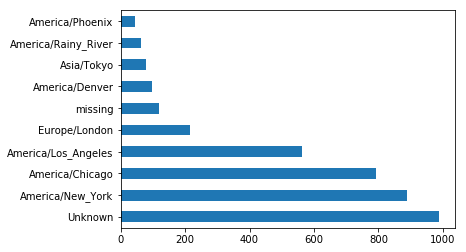

In [14]:
# 绘制条形图
import matplotlib.pyplot as plt            # 导入画图包
plt.figure()                               # 设置图布
tz_counts[:10].plot(kind='barh',rot=0)     # 画图   
plt.show()                                 # 将图显示出来 

In [17]:
frame['a'][1]

'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.31 (KHTML, like Gecko) Chrome/26.0.1410.64 Safari/537.31'

In [18]:
frame['a'][50]

'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.2; WOW64; Trident/6.0; .NET4.0E; .NET4.0C; .NET CLR 3.5.30729; .NET CLR 2.0.50727; .NET CLR 3.0.30729; HPDTDFJS; Microsoft Outlook 14.0.6131; ms-office; MSOffice 14)'

In [19]:
frame['a'][51]

'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/534.57.2 (KHTML, like Gecko) Version/5.1.7 Safari/534.57.2'

In [20]:
results = Series([x.split()[0] for x in frame.a.dropna()])
print(type(results))
results[:10]

<class 'pandas.core.series.Series'>


0    Mozilla/5.0
1    Mozilla/5.0
2    Mozilla/5.0
3    Mozilla/4.0
4    Mozilla/5.0
5    Mozilla/5.0
6    Mozilla/5.0
7    Mozilla/5.0
8    Mozilla/5.0
9    Mozilla/5.0
dtype: object

In [21]:
# 统计次数
results.value_counts()[:10]

Mozilla/5.0           3974
Mozilla/4.0            280
ShortLinkTranslate      38
CakePHP                 34
Dalvik/1.6.0            30
Opera/9.80              29
Xenu                    24
TVersity                24
iCoreService            20
feedzirra                6
dtype: int64

In [22]:
# print(frame)
cframe=frame[frame.a.notnull()]
# print(cframe[:10])

operating_system = np.where(cframe['a'].str.contains('Windows'),                           'Windows','Not Windows')
print(operating_system[:5])

# 按照是否为windows对时区进行分组
by_tz_os = cframe.groupby(['tz',operating_system])
print(by_tz_os)
# 通过size对分组的结果进行计数，unstack进行重塑，如果没有重塑会将分组的结果显示为一列
agg_counts = by_tz_os.size().unstack().fillna(0)
print(agg_counts[:10])



['Not Windows' 'Windows' 'Not Windows' 'Windows' 'Not Windows']
                     Not Windows  Windows
tz                                       
                           840.0    149.0
Africa/Blantyre              0.0      1.0
Africa/Cairo                 0.0      4.0
Africa/Casablanca            0.0      2.0
Africa/Ceuta                 3.0      1.0
Africa/Gaborone              1.0      0.0
Africa/Johannesburg          0.0      2.0
Africa/Lagos                 0.0      1.0
Africa/Nairobi               0.0      3.0
Africa/Tripoli               0.0      1.0


In [23]:
# 按照升序进行排列
indexer = agg_counts.sum(1).argsort()
print(indexer[:10])

tz
                       120
Africa/Blantyre         27
Africa/Cairo           100
Africa/Casablanca       75
Africa/Ceuta            95
Africa/Gaborone         92
Africa/Johannesburg     91
Africa/Lagos            46
Africa/Nairobi          49
Africa/Tripoli          23
dtype: int64


In [24]:
count_subset = agg_counts.take(indexer)[-10:]
print(count_subset)

                      Not Windows  Windows
tz                                        
America/Indianapolis         24.0     17.0
America/Phoenix              22.0     22.0
America/Rainy_River          42.0     20.0
Asia/Tokyo                   75.0      5.0
America/Denver               41.0     56.0
Europe/London               164.0     52.0
America/Los_Angeles         296.0    267.0
America/Chicago             363.0    429.0
America/New_York            584.0    305.0
                            840.0    149.0


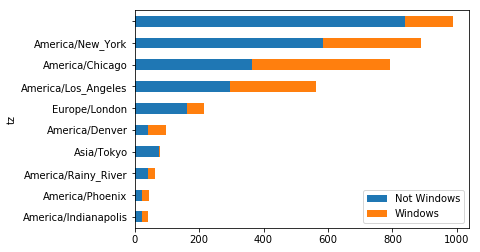

In [25]:
# stacked=True  生成一张堆积条形图
count_subset.plot(kind="barh",stacked=True)
plt.show()

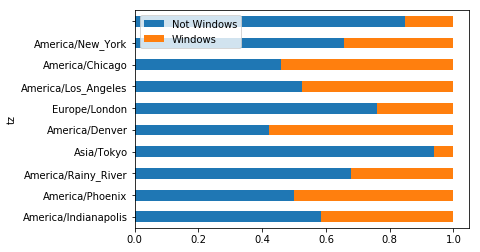

In [26]:
# 为了更明显的显示比例
normed_subset = count_subset.div(count_subset.sum(1),axis=0)
normed_subset.plot(kind="barh",stacked=True)
plt.show()

## 2.MovieLens1M数据集

下载数据来源：   
    https://grouplens.org/datasets/movielens/

数据集介绍：ml-1m

    这个数据集(ml-20m)描述五星级评级和自由文本标记活动 MovieLens ,电影推荐服务。 它包含465564评级在27278部电影和465564标签应用程序。 这些数据是由09年1月之间138493用户,1995年和1995年3月31日。 2016年10月17日,这个数据集生成。

In [23]:
import pandas as pd
unames = ['user_id','gender','age','occupations','zip']
# engine=‘Python’指定解释的语言，避免警告提醒ParserWarning
users = pd.read_table('ml-1m/users.dat',sep='::',header=None,names=unames,engine ='python')

rnames = ['user_id','movie_id','rating','timestamp']
ratings = pd.read_table('ml-1m/ratings.dat',sep='::',header=None,names=rnames,engine ='python')

mnames = ['movie_id','title','genres']
movies = pd.read_table('ml-1m/movies.dat',sep="::",header=None,names=mnames,engine ='python')

# ，如果不加engine ='python'，则或警告D：\ ProgramData \ Anaconda3 \ lib \ site-packages \ ipykernel_launcher.py：3：ParserWarning：回退到'python'引擎，因为'c'引擎不支持正则表达式分隔符（分隔符> 1个字符，与'\ s +'被解释为正则表达式）;你可以通过指定engine ='python'来避免这个警告。

In [25]:
users[:5]

,user_id,gender,age,occupations,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [26]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [27]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [28]:
# 合并users和ratings以及movies
data = pd.merge(pd.merge(users,ratings),movies)
print(data[1:5])

   user_id gender  age  occupations    zip  movie_id  rating  timestamp  \
1        2      M   56           16  70072      1193       5  978298413   
2       12      M   25           12  32793      1193       4  978220179   
3       15      M   25            7  22903      1193       4  978199279   
4       17      M   50            1  95350      1193       5  978158471   

                                    title genres  
1  One Flew Over the Cuckoo's Nest (1975)  Drama  
2  One Flew Over the Cuckoo's Nest (1975)  Drama  
3  One Flew Over the Cuckoo's Nest (1975)  Drama  
4  One Flew Over the Cuckoo's Nest (1975)  Drama  


In [36]:
# 根据性别统计每部电影的平均评分
mean_ratings = data.pivot_table('rating',index='title',columns='gender',aggfunc='mean')
print(mean_ratings.shape)
print(mean_ratings.head())
# 该数据的行标为电影名称，列标为性别，内容为电影平均得分  3706*2数量

(3706, 2)
gender                                F         M
title                                            
$1,000,000 Duck (1971)         3.375000  2.761905
'Night Mother (1986)           3.388889  3.352941
'Til There Was You (1997)      2.675676  2.733333
'burbs, The (1989)             2.793478  2.962085
...And Justice for All (1979)  3.828571  3.689024


In [23]:
#利用title进行分组，得到每个电影的数量
ratings_by_title = data.groupby('title').size()
print(ratings_by_title[:10])

# 统计该电影数量大于250的电影名称
active_titles = ratings_by_title.index[ratings_by_title>250]
print(active_titles)

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64
Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       '

In [47]:
mean_ratings = mean_ratings.loc[active_titles,:]
print(mean_ratings.tail())
print(mean_rating.shape)

gender                               F         M
title                                           
Young Guns (1988)             3.371795  3.425620
Young Guns II (1990)          2.934783  2.904025
Young Sherlock Holmes (1985)  3.514706  3.363344
Zero Effect (1998)            3.864407  3.723140
eXistenZ (1999)               3.098592  3.289086
(1214, 2)


In [51]:
# 对性别中的女性的评分从高到低进行排序
top_famale_ratings = mean_ratings.sort_values(by='F',ascending=False)
print(top_famale_ratings.shape)
print(top_famale_ratings[:10])

(1214, 2)
gender                                                     F         M
title                                                                 
Close Shave, A (1995)                               4.644444  4.473795
Wrong Trousers, The (1993)                          4.588235  4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)       4.572650  4.464589
Wallace & Gromit: The Best of Aardman Animation...  4.563107  4.385075
Schindler's List (1993)                             4.562602  4.491415
Shawshank Redemption, The (1994)                    4.539075  4.560625
Grand Day Out, A (1992)                             4.537879  4.293255
To Kill a Mockingbird (1962)                        4.536667  4.372611
Creature Comforts (1990)                            4.513889  4.272277
Usual Suspects, The (1995)                          4.513317  4.518248


In [60]:
# 计算南女性平均评分的分歧
mean_ratings['diff'] = mean_ratings['F']-mean_ratings['M']
# print(mean_ratings[:15])
# 对结果进行排序
sorted_by_diff = mean_ratings.sort_values(by='diff')    # 默认为升序
print(sorted_by_diff[:5])          # 男性更喜欢的电影
print(sorted_by_diff[::-1][:5])  # 女性更喜欢的电影


gender                                         F         M      diff
title                                                               
Good, The Bad and The Ugly, The (1966)  3.494949  4.221300 -0.726351
Kentucky Fried Movie, The (1977)        2.878788  3.555147 -0.676359
Dumb & Dumber (1994)                    2.697987  3.336595 -0.638608
Longest Day, The (1962)                 3.411765  4.031447 -0.619682
Cable Guy, The (1996)                   2.250000  2.863787 -0.613787
gender                            F         M      diff
title                                                  
Dirty Dancing (1987)       3.790378  2.959596  0.830782
Jumpin' Jack Flash (1986)  3.254717  2.578358  0.676359
Grease (1978)              3.975265  3.367041  0.608224
Little Women (1994)        3.870588  3.321739  0.548849
Steel Magnolias (1989)     3.901734  3.365957  0.535777


In [74]:
# 只找出分歧最大的电影，不考虑性性别，可以计算评分的方差和标准差
# 根据电影名称计算得分数据的标准差
rating_std_by_title = data.groupby('title')['rating'].std()
# 根据active_title进行过滤       .loc用于基于标签的索引或  .iloc进行位置索引
rating_std_by_title = rating_std_by_title.loc[active_titles]
print(rating_std_by_title.shape)
print(rating_std_by_title[:5])
# 按照降序进行排列
print(rating_std_by_title.sort_values(ascending=False)[:5])

(1214,)
title
'burbs, The (1989)                   1.107760
10 Things I Hate About You (1999)    0.989815
101 Dalmatians (1961)                0.982103
101 Dalmatians (1996)                1.098717
12 Angry Men (1957)                  0.812731
Name: rating, dtype: float64
title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Name: rating, dtype: float64


## 3.1880-2010年间全美婴儿姓名

数据来源：

    http://www.ssa.gov.oact/babynames/limits.htmls?

In [11]:
# 读取数据
import pandas as pd
# 该数据为1880年美国出生婴儿的姓名，性别，生日
names = pd.read_table('names/yob1880.txt')
print(babynames.shape)
print(names.head())
names1880 = pd.read_table('names/yob1880.txt',sep = ',',names=['name','sex','birth'])
# names1880 = pd.read_csv('names/yob1880.txt',names=['name','sex','birth'])
print(names1880.head())

(1999, 1)
        Mary,F,7065
0       Anna,F,2604
1       Emma,F,2003
2  Elizabeth,F,1939
3     Minnie,F,1746
4   Margaret,F,1578
        name sex  birth
0       Mary   F   7065
1       Anna   F   2604
2       Emma   F   2003
3  Elizabeth   F   1939
4     Minnie   F   1746


In [14]:
# 根据性别分组，统计每个性别的人数
print(names1880.groupby('sex').birth.count())
# 根据性别对出生日期进行求和
print(names1880.groupby('sex').birth.sum())

sex
F     942
M    1058
Name: birth, dtype: int64
sex
F     90993
M    110491
Name: birth, dtype: int64


In [33]:
# 2017是目前统计的截止的有效年份

years = range(1880,2018)

pieces = []

columns = ['name','sex','births']

for year in years:
    path='names/yob%d.txt' %year
    frame = pd.read_csv(path,names=columns)
    frame['years'] = year                    # 添加新列years，值设置为year
    pieces.append(frame)
names = pd.concat(pieces,ignore_index=True)
print(names.shape)
print(names.head())

(1924665, 4)
        name sex  births  years
0       Mary   F    7065   1880
1       Anna   F    2604   1880
2       Emma   F    2003   1880
3  Elizabeth   F    1939   1880
4     Minnie   F    1746   1880


In [37]:
# 数据名.pivot(计算的数据，行标，列表，aggfunc=函数)
total_births =names.pivot_table('births',index='years',columns='sex',aggfunc=sum)
print(total_births.tail())

sex          F        M
years                  
2013   1750321  1886989
2014   1781072  1915239
2015   1778883  1909804
2016   1763916  1889052
2017   1711811  1834490


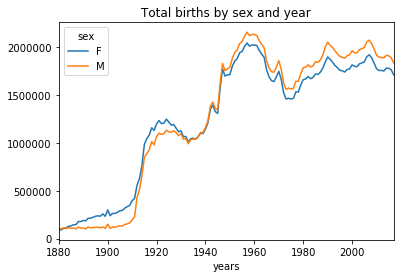

        name sex  births  years      prop
0       Mary   F    7065   1880  0.077643
1       Anna   F    2604   1880  0.028618
2       Emma   F    2003   1880  0.022013
3  Elizabeth   F    1939   1880  0.021309
4     Minnie   F    1746   1880  0.019188


In [50]:
import matplotlib.pyplot as plt 
total_births.plot(title='Total births by sex and year')     # 添加图标题
plt.show()
def add_group(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['years','sex']).apply(add_group)
sort_names = names.sort_values(by='prop',ascending=False)
print(names.head())

In [52]:
# 验证prop数据和是否为1
import numpy as np
np.allclose(names.groupby(['years','sex']).prop.sum(),1)

True

In [61]:
# 每个sex与year组合的前100个名字
def get_top1000(group):
    return group.sort_values(by='births',ascending=False)[:1000]
grouped = names.groupby(['years','sex'])
top1000 = grouped.apply(get_top1000)
print(top1000.head())
pieces = []
for year,group in names.groupby(['years','sex']):
    pieces.append(group.sort_values(by='births',ascending=False)[:1000])
top1000 = pd.concat(pieces,ignore_index=True)

                  name sex  births  years      prop
years sex                                          
1880  F   0       Mary   F    7065   1880  0.077643
          1       Anna   F    2604   1880  0.028618
          2       Emma   F    2003   1880  0.022013
          3  Elizabeth   F    1939   1880  0.021309
          4     Minnie   F    1746   1880  0.019188


### 1）分析命名趋势

In [65]:
boys = top1000[top1000.sex =='M']
girls = top1000[top1000.sex == 'F']
total_births = top1000.pivot_table('births',index='years',columns='name',aggfunc=sum)
print(total_births.tail())

name   Aaden  Aadhya  Aaliyah  Aanya  Aarav   Aaron  Aarush  Ab  Abagail  Abb  \
years                                                                           
2013   203.0     NaN   5229.0    NaN  495.0  7301.0     NaN NaN      NaN  NaN   
2014   238.0     NaN   4877.0  266.0  531.0  7391.0     NaN NaN      NaN  NaN   
2015   297.0     NaN   4859.0    NaN  540.0  7152.0   211.0 NaN      NaN  NaN   
2016     NaN   284.0   4636.0    NaN  519.0  7150.0     NaN NaN      NaN  NaN   
2017   240.0   290.0   4160.0    NaN  524.0  7165.0     NaN NaN      NaN  NaN   

name    ...       Zoe    Zoey   Zoie  Zola  Zollie  Zona  Zora  Zula   Zuri  \
years   ...                                                                   
2013    ...    5969.0  7238.0  432.0   NaN     NaN   NaN   NaN   NaN  568.0   
2014    ...    5870.0  7401.0  365.0   NaN     NaN   NaN   NaN   NaN  666.0   
2015    ...    6038.0  6941.0  371.0   NaN     NaN   NaN   NaN   NaN  713.0   
2016    ...    5737.0  6438.0  311.0 

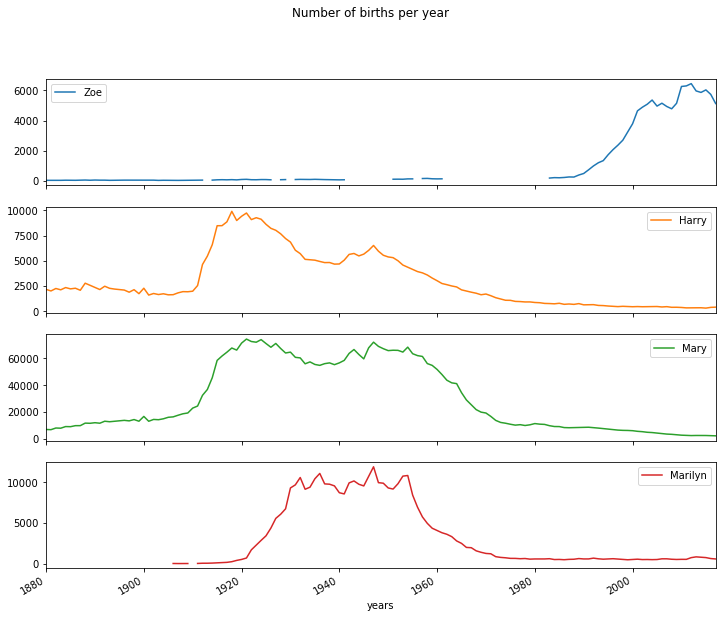

In [72]:
# 这几个名字随时间变化的使用数量
subset = total_births[['Zoe','Harry','Mary','Marilyn']]
subset.plot(subplots =True,figsize =(12,10),grid=False,title='Number of births per year')
plt.show()

###  2）评估命名多样性的增长

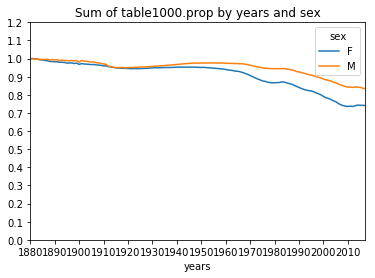

In [78]:
# 前100个人在总出生人数中所占的比例
table = top1000.pivot_table('prop',index='years',columns='sex',aggfunc=sum)
table.plot(title='Sum of table1000.prop by years and sex',yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10))
plt.show()

In [77]:
df =boys[boys.years == 2010]
print(df.head())

           name sex  births  years      prop
260877    Jacob   M   22117   2010  0.011544
260878    Ethan   M   18000   2010  0.009395
260879  Michael   M   17342   2010  0.009051
260880   Jayden   M   17171   2010  0.008962
260881  William   M   17048   2010  0.008898


In [82]:
prop_cumsum = df.sort_values(by='prop',ascending=False).prop.cumsum()
print(prop_cumsum.head())
print(prop_cumsum.searchsorted(0.5))

260877    0.011544
260878    0.020939
260879    0.029990
260880    0.038952
260881    0.047850
Name: prop, dtype: float64
[116]


In [87]:
df = boys[boys.years == 1990]
in1990 = df.sort_values(by='prop',ascending=False).prop.cumsum()
print(in1990.head())
print(in1990.searchsorted(0.5)+1)

220877    0.031799
220878    0.057290
220879    0.079113
220880    0.100163
220881    0.116635
Name: prop, dtype: float64
[45]


In [96]:
def get_quantile_count(group,q=0.5):
    group = group.sort_values(by='prop',ascending=False)
    return group.prop.cumsum().searchsorted(q)+1
diversity = top1000.groupby(['years','sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
print(diversity.head())

sex       F     M
years            
1880   [38]  [14]
1881   [38]  [14]
1882   [38]  [15]
1883   [39]  [15]
1884   [39]  [16]


### 3)最后一个字母的变革

In [101]:
# 从name列取出最后一个字母
get_last_letter = lambda x:x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births',index=last_letters,columns=['sex','years'],aggfunc=sum)
subtable = table.reindex(columns=[1910,1960,2010],level='years')
print(subtable.head())
print(subtable.sum())

sex                 F                            M                    
years            1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108397.0  691250.0  676646.0    977.0    5212.0   28859.0
b                 NaN     694.0     455.0    411.0    3914.0   39264.0
c                 5.0      49.0     955.0    482.0   15460.0   23341.0
d              6751.0    3730.0    2640.0  22113.0  262136.0   44817.0
e            133600.0  435043.0  316665.0  28665.0  178785.0  130228.0
sex  years
F    1910      396502.0
     1960     2022018.0
     2010     1774758.0
M    1910      194213.0
     1960     2132359.0
     2010     1915942.0
dtype: float64


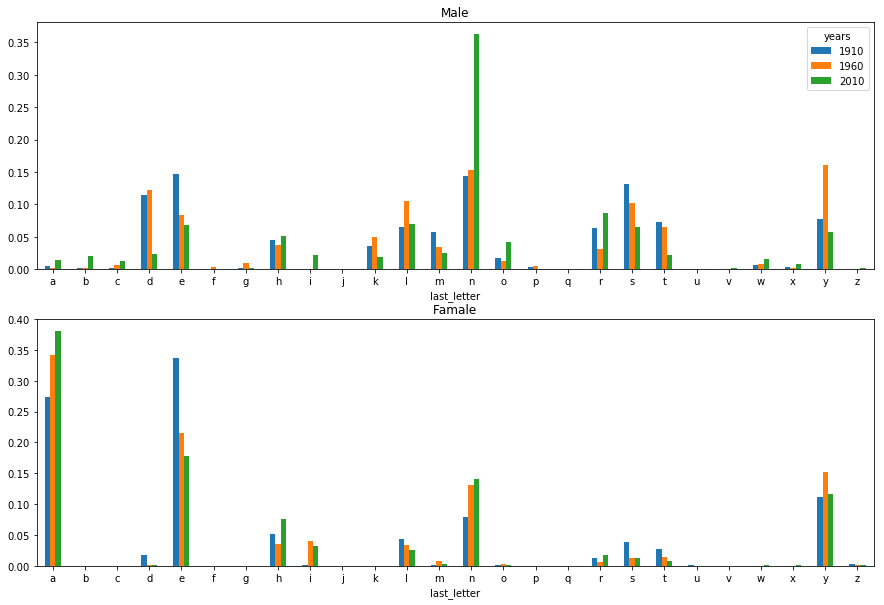

In [106]:
letter_prop = subtable/subtable.sum().astype(float)
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,1,figsize=(15,10))
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='Famale',legend=False)
plt.show()
# 男孩女孩名字中各个字母的比例

In [108]:
letter_prop = table / table.sum().astype(float)
dny_ts = letter_prop.loc[['d','n','y'],'M'].T
print(dny_ts.head())

last_letter         d         n         y
years                                    
1880         0.083057  0.153216  0.075762
1881         0.083242  0.153212  0.077455
1882         0.085332  0.149561  0.077538
1883         0.084051  0.151653  0.079148
1884         0.086122  0.149927  0.080408


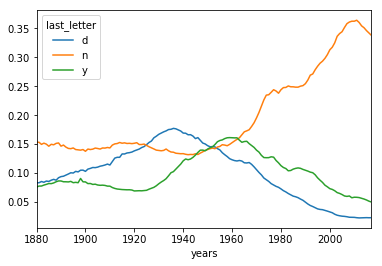

In [111]:
dny_ts.plot()
# 各年出生的男孩名字以d/n/y结尾的人数比例
plt.show()

### 4）变成女孩名字的男孩名字

In [112]:
all_names = top1000.name.unique()

mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
print(lesley_like)

['Leslie' 'Lesley' 'Leslee' 'Lesli' 'Lesly']


name
Leslee       993
Lesley     35032
Lesli        929
Leslie    377561
Lesly      11432
Name: births, dtype: int64
sex      F   M
years         
2013   1.0 NaN
2014   1.0 NaN
2015   1.0 NaN
2016   1.0 NaN
2017   1.0 NaN


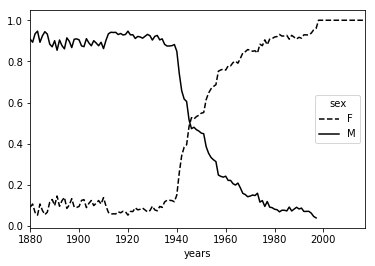

In [118]:
filtered = top1000[top1000.name.isin(lesley_like)]
print(filtered.groupby('name').births.sum())
table = filtered.pivot_table('births',index='years',columns='sex',aggfunc='sum')
table = table.div(table.sum(1),axis=0)
print(table.tail())
table.plot(style={'M':'k-','F':'k--'})
plt.show()
# 各年度使用Lesley型名字的男女比例